In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = 0.2
x2 = 0.4

In [3]:
x = symbols('x')
f = log(x) + (x + 1)**3
f

(x + 1)**3 + log(x)

In [4]:
def func(x):
    return (x + 1) ** 3 + np.log(x)

# Завдання 3 
## Для функцій, що задані в таблиці 6.1, побудувати графіки і переконатися в додатності функції на визначеному інтервалі, інакше перевизначити інтервали інтегрування або вид початкової функції таким чином, щоб функція була невід’ємною на обраному інтервалі інтегрування. Інформацію про зміни в варіанті завдання внести у звіт.



In [5]:
x_values = np.linspace(x1, x2, 100)
y_values = [func(i) for i in x_values] 

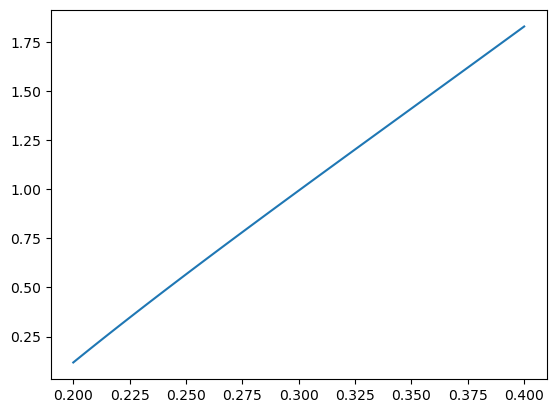

In [6]:
plt.plot(x_values, y_values)

## Бачимо, що наша функція додатня на визначеному інтервалі.

# Завдання 1 
##  Скласти таблиці скінченних різниць з регулярним кроком, використовуючи значення функцій таблиці 6.1. Визначити 1-у і 2-у похідні функції в утворених вузлах, використовуючи для цього несиметричні обернені, прямі чи симетричні різницеві схеми диференціювання, визначаючи доцільність застосування тієї чи іншої схеми розташуванням вузла функції. Визначити і оцінити як величини розбіжностей співвідносяться з порядком точності різницевої схеми.


In [7]:
num_points = 5
x_val = np.linspace(x1, x2, num_points)
y_val = [func(i) for i in x_val]
step = (x2 - x1) / num_points # крок
pprint(x_val)
pprint(y_val)

[0.2  0.25 0.3  0.35 0.4 ]
[0.11856208756589948, 0.5668306388801094, 0.9930271956740642, 1.41055287550132
28, 1.8277092681258442]


In [8]:
f1 = f.diff(x)
f2 = f1.diff(x)
print('Похідна першого порядку')
pprint(f1)
print('Похідна другого порядку')
pprint(f2)

Похідна першого порядку
         2   1
3⋅(x + 1)  + ─
             x
Похідна другого порядку
          1 
6⋅x + 6 - ──
           2
          x 


In [9]:
def forward_difference(f, x, h):
    return (f.subs(x, x + h) - f) / h

def backward_difference(f, x, h):
    return (f - f.subs(x, x - h)) / h

def central_difference(f, x, h):
    return (f.subs(x, x + h) - f.subs(x, x - h)) / (2 * h)

def compute_error(f_diff_exact, f_diff_approx):
    error = abs(f_diff_exact - f_diff_approx) / f_diff_exact  
    return error


In [10]:
# Символьна змінна
x = symbols('x')
h = symbols('h')

In [11]:
# Визначення похідних за допомогою різницевих схем
for val in x_val:
    print(f"Для x = {val}:")
    print()

    # Звичайний метод обчислення похідних
    f_diff_exact = diff(f, x)
    f_diff2_exact = diff(f_diff_exact, x)
    print('Перша похідна обчислена звийчайним методом :', f_diff_exact.subs(x, val))
    print('Друга похідна обчислена звийчайним методом :', f_diff2_exact.subs(x, val))
    print()
    
    # Перша похідна
    df_forward = forward_difference(f, x, h).subs([(x, val), (h, step)])
    df_backward = backward_difference(f, x, h).subs([(x, val), (h, step)])
    df_central = central_difference(f, x, h).subs([(x, val), (h, step)])
    
    print("Перша похідна:")
    print(f"Forward difference: {df_forward}")
    print(f"Backward difference: {df_backward}")
    print(f"Central difference: {df_central}")
    print()
   
    # Обчислення похибок першої похідної
    error_forward = compute_error(f_diff_exact.subs(x, val), df_forward)
    error_backward = compute_error(f_diff_exact.subs(x, val), df_backward)
    error_central = compute_error(f_diff_exact.subs(x, val), df_central)
    
    print("Відносні похибки першої похідної:")
    print(f"Forward difference: {error_forward}")
    print(f"Backward difference: {error_backward}")
    print(f"Central difference: {error_central}")
    print()
   
    # Друга похідна
    d2f_forward = forward_difference(f_diff_exact, x, h).subs([(x, val), (h, step)])
    d2f_backward = backward_difference(f_diff_exact, x, h).subs([(x, val), (h, step)])
    d2f_central = central_difference(f_diff_exact, x, h).subs([(x, val), (h, step)])
    
    print("Друга похідна:")
    print(f"Forward difference: {d2f_forward}")
    print(f"Backward difference: {d2f_backward}")
    print(f"Central difference: {d2f_central}")
    print()

    # Обчислення похибок другої похідної
    error_d2f_forward = compute_error(f_diff2_exact.subs(x, val), d2f_forward)
    error_d2f_backward = compute_error(f_diff2_exact.subs(x, val), d2f_backward)
    error_d2f_central = compute_error(f_diff2_exact.subs(x, val), d2f_central)

    print("Відносні похибки другої похідної:")
    print(f"Forward difference: {error_d2f_forward}")
    print(f"Backward difference: {error_d2f_backward}")
    print(f"Central difference: {error_d2f_central}")
    print()



Для x = 0.2:

Перша похідна обчислена звийчайним методом : 9.32000000000000
Друга похідна обчислена звийчайним методом : -17.8000000000000

Перша похідна:
Forward difference: 9.02363891984889
Backward difference: 9.75618878285525
Central difference: 9.38991385135207

Відносні похибки першої похідної:
Forward difference: 0.0317983991578448
Backward difference: 0.0468013715509927
Central difference: 0.00750148619657416

Друга похідна:
Forward difference: -13.5133333333333
Backward difference: -24.1700000000000
Central difference: -18.8416666666667

Відносні похибки другої похідної:
Forward difference: -0.240823970037453
Backward difference: -0.357865168539326
Central difference: -0.0585205992509366

Для x = 0.25:

Перша похідна обчислена звийчайним методом : 8.68750000000000
Друга похідна обчислена звийчайним методом : -8.50000000000000

Перша похідна:
Forward difference: 8.54960012795684
Backward difference: 8.89793467861944
Central difference: 8.72376740328814

Відносні похибки першої 

## Такі значення похибок чисельного диференціювання дають можливість стверджувати про досить високу точність обчислень.

# Завдання 2 
## Для визначених в п. 1 вузлів записати інтерполяційний поліном, знайти 1-у і 2-у похідні функції з табл. 6.1 у вузлах інтерполяції. Порівняти отримані значення з точними.


In [12]:
from scipy.interpolate import lagrange

# Вузли інтерполяції
x_values = x_val

# Значення функції в вузлах
f_values = [float(f.subs(x, x_val)) for x_val in x_values]

# Створення інтерполяційного полінома методом Лагранжа
interpolating_poly = lagrange(x_values, f_values)

# Виведення інтерполяційного полінома
print("Інтерполяційний поліном:")
print(interpolating_poly)


Інтерполяційний поліном:
     4         3         2
-34 x + 55.26 x - 33.03 x + 16.97 x - 2.342


In [13]:
# Порівняння значень з точними
for val in x_values:
    # Підстановка значень x в поліном
    poly_value = interpolating_poly(val)
    
    # Обчислення першої та другої похідної в вузлах інтерполяції
    poly_diff_1 = interpolating_poly.deriv(m=1)(val)
    poly_diff_2 = interpolating_poly.deriv(m=2)(val)
    
    # Обчислення точних значень першої та другої похідної
    f_diff_exact = diff(f, x)
    f_diff2_exact = diff(f_diff_exact, x)
    f_diff_exact = f_diff_exact.subs(x, val)
    f_diff2_exact = f_diff2_exact.subs(x, val)

    # Виведення результатів
    print(f"\nДля x = {val}:")
    print(f"Значення функції з інтерполяційним поліномом: {poly_value}")
    print(f"Перша похідна з інтерполяційним поліномом: {poly_diff_1}")
    print(f"Друга похідна з інтерполяційним поліномом: {poly_diff_2}")
    print(f"Точне значення першої похідної: {f_diff_exact}")
    print(f"Точне значення другої похідної: {f_diff2_exact}")



Для x = 0.2:
Значення функції з інтерполяційним поліномом: 0.11856208756575448
Перша похідна з інтерполяційним поліномом: 9.300929394124513
Друга похідна з інтерполяційним поліномом: -16.0590716857159
Точне значення першої похідної: 9.32000000000000
Точне значення другої похідної: -17.8000000000000

Для x = 0.25:
Значення функції з інтерполяційним поліномом: 0.566830638879928
Перша похідна з інтерполяційним поліномом: 8.691481476252989
Друга похідна з інтерполяційним поліномом: -8.65881354845169
Точне значення першої похідної: 8.68750000000000
Точне значення другої похідної: -8.50000000000000

Для x = 0.30000000000000004:
Значення функції з інтерполяційним поліномом: 0.9930271956738395
Перша похідна з інтерполяційним поліномом: 8.401051187348669
Друга похідна з інтерполяційним поліномом: -3.2983665270277527
Точне значення першої похідної: 8.40333333333333
Точне значення другої похідної: -3.31111111111111

Для x = 0.35000000000000003:
Значення функції з інтерполяційним поліномом: 1.410

## Знову бачимо, що результати обчислення похідних за інтерполяційним поліномом майже співпадають з точними значеннями

# Завдання 4
## Скласти програми чисельного інтегрування за наступними розрахунковими схемами:
## Ручний розрахунок : метод трапецій
## Чисельний розрахунок : метод Сімпсона і метод Ньютона

## Метод трапецій

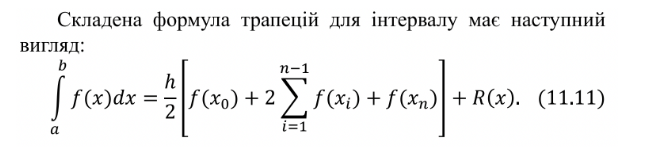

In [14]:
def trapezoidal_integration(f, a, b, n):
    """Функція для чисельного інтегрування методом трапецій"""
    x = np.linspace(a, b, n+1)  # Генеруємо рівномірну сітку
    y = f(x)  # Обчислюємо значення функції на сітці
    h = (b - a) / n  # Ширина кожного трапеції
    integration = h * (np.sum(y) - 0.5 * (y[0] + y[n]))  # Виконуємо чисельне інтегрування
    return integration

n = 2  # кількість підрозділів (кількість трапецій)

result = trapezoidal_integration(func, x1, x2, n)

print("Результат чисельного інтегрування методом трапеції:", result)

Результат чисельного інтегрування методом трапеції: 0.19661628735199363


In [15]:
integral = integrate(f, x)
integral

x**4/4 + x**3 + 3*x**2/2 + x*log(x)

In [16]:
true_value = integral.subs(x, x2) - integral.subs(x, x1)
print('Точне значення :', true_value)

Точне значення : 0.197371289737158


In [17]:
pohibka = abs(true_value - result) / true_value
print('Відносна похибка :', pohibka)

Відносна похибка : 0.00382528981884820


# Завдання 6
## Визначити похибку отриманого результату за залишковим членом, за правилом Рунге і за допомогою екстраполяції Річардсона.


## За допомогою екстраполяції Річардсона спробуємо досягти більшої точності

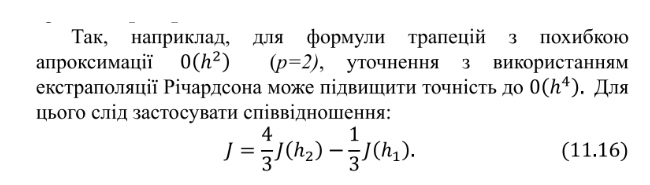

In [18]:
I_n = trapezoidal_integration(func, x1, x2, n)

# Обчислення інтегралу на подвійному рівні розбиття 2n
I_2n = trapezoidal_integration(func, x1, x2, 2 * n)

# Використання екстраполяції Річардсона для поліпшення результатів
richardson_extrapolation = (4 * I_2n - I_n) / 3
richardson_extrapolation

0.19736433007609336

In [19]:
pohibka_after_extrapolation = abs(true_value - richardson_extrapolation) / true_value
print('Відносна похибка :', pohibka_after_extrapolation)

Відносна похибка : 3.52617702099813e-5


In [20]:
pohibka_after_extrapolation < pohibka

True

## Бачимо, що результат покращився

## Підрахуємо похибку за правилом Рунге

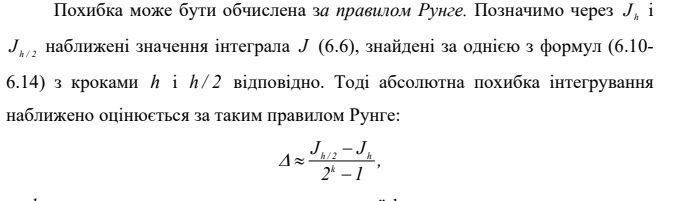

In [21]:
k=2
error_estimate = abs(richardson_extrapolation - I_n) / (2**k - 1)
error_estimate

0.00024934757469990965

# Завдання 5
## Обрати крок інтегрування, що забезпечує точність отриманого результату на рівні 0.001.


In [22]:
M = max(y_values)
M

1.8277092681258442

In [23]:
# Обчислюємо крок інтегрування
epsilon = 0.001
h = sqrt(24 * epsilon / (x2 - x1) * M)
h

0.468321590549807

In [24]:
n = ceiling((x2 - x1) / h)
n

1

In [25]:
h = (x2 - x1) / n
h

0.200000000000000

In [37]:
vals = [func(x1 + float(h) * (i - 0.5)) for i in range(1, n + 1)]
val = h * sum(vals)
val

0.198605439134813

## Як бачимо, результати розрахунків практично не відрізняються.

## Метод Сімпсона

In [27]:
from scipy import integrate
result = integrate.simps(y_val, x_val)
print("Значення інтеграла методом Сімпсона", result)

Значення інтеграла методом Сімпсона 0.19736433007609339


## Метод Ньютона

In [28]:
result,_ = integrate.fixed_quad(func, x1, x2, n=10)
print("Значення інтеграла методом Ньютона:", result)

Значення інтеграла методом Ньютона: 0.197371289737158


# Завдання 7
## Використовуючи рекурентний алгоритм, отримати декілька наближень для заданного інтеграла.



## Застосуємо рекуренту формулу трапецій, щоб обчислити наближення T( j ), j = 0,1,2,...,6 для нашого інтеграла з точністю 0.0001

In [45]:
def recursive_integration(f, a, b, n, prev_integration, epsilon):
    """Функція для рекурсивного обчислення наближених значень інтегралу з точністю ε"""
    integration = trapezoidal_integration(f, a, b, n)

    if np.abs(integration - prev_integration) < epsilon:
        return integration
    else:
        return recursive_integration(f, a, b, 2 * n, integration, epsilon)


In [46]:
epsilon = 0.0001

# Обчислення наближень T(j) з рекурентною формулою трапецій
prev_integration = trapezoidal_integration(func, x1, x2, n)
j = 1
while True:
    integration = recursive_integration(func, x1, x2, 2**j, prev_integration, epsilon)
    if np.abs(integration - prev_integration) < epsilon:
        break
    prev_integration = integration
    j += 1

# Виведення результатів
print("Наближення T(j) з точністю ε = 0.0001:")
for i in range(j+1):
    n = 2**i
    integration = trapezoidal_integration(func, x1, x2, n)
    print(f"T({i}): {integration}")

Наближення T(j) з точністю ε = 0.0001:
T(0): 0.19462713556917438
T(1): 0.19661628735199363
T(2): 0.19717731939506844


## Бачимо, що нам було необхідно 3 ітерації, щоб досягти результату з точністю 0.0001